### EDA BY Harish Kumar on Zomato Data set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df.head(4)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365


In [3]:
df.shape

(9551, 21)

In [4]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### In This Data Analysis we will see 
- Find Missing value and how to deal with them
-Analysis of both categorical and numeric features 
-correlation between features 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
#list compherionsen

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

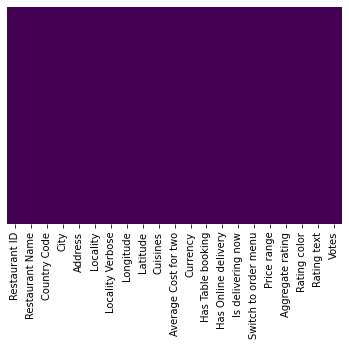

In [8]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis' )

In [9]:
#join two data frames , see how
df_country_code = pd.read_excel('Country-Code.xlsx')
df_country_code.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [10]:
df2 = pd.merge(df,df_country_code,how = 'left', on = 'Country Code')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [11]:
Country_names = df2.Country.value_counts()
Country_names = df2.Country.value_counts().index


In [12]:
Country_names1 = df2.Country.value_counts().index.to_list()
Country_names1

['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'UAE',
 'South Africa',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Singapore',
 'Qatar',
 'Sri Lanka',
 'Canada']

In [13]:
Country_values = df2.Country.value_counts().values
Country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1688ec97a30>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.04083034015611012, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

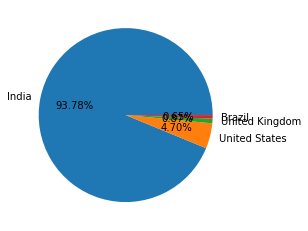

In [14]:
plt.pie( Country_values[:4],
        labels=Country_names1[:4],
        autopct = '%1.2f%%')

observation:
Only in india zomato having more cuatomer segment and busniss


In [15]:
df2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [16]:
Ratings = df2.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'count'})
Ratings.head()

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


### Observations :
    here 2148 customer doesnt rated the app itself
    when ratings lie in red its Poor
    similarly if Orange then Average and yellow and dark green its Very good and Excellent 

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

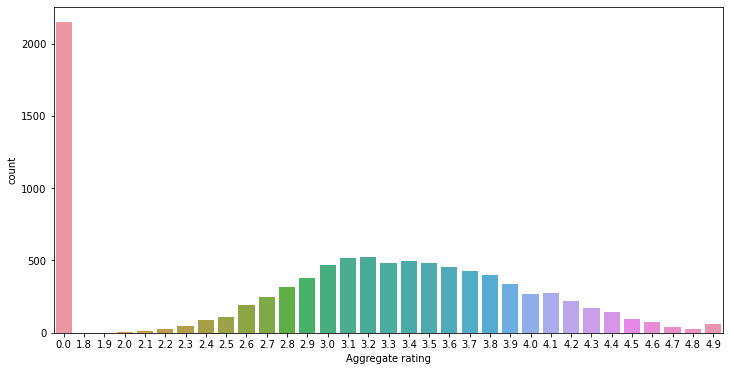

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize']= (12,6)
sns.barplot(x= 'Aggregate rating',y='count',data = Ratings )

<AxesSubplot:xlabel='Aggregate rating', ylabel='count'>

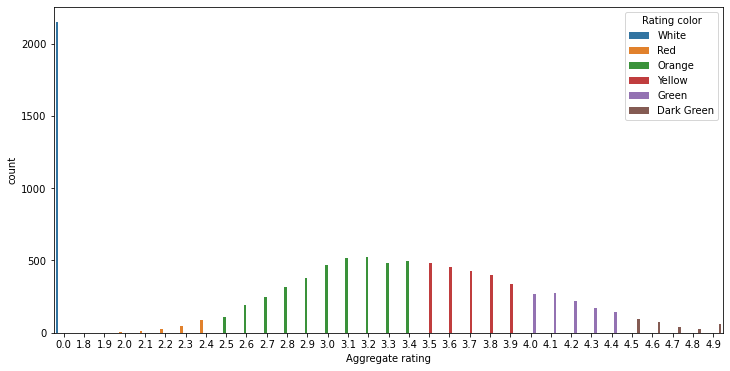

In [18]:

sns.barplot(x= 'Aggregate rating',y='count',data = Ratings,hue = 'Rating color')

### Observation :
    we can see clearly rating is max in between 3.0 and 3.5

<AxesSubplot:xlabel='Rating color', ylabel='count'>

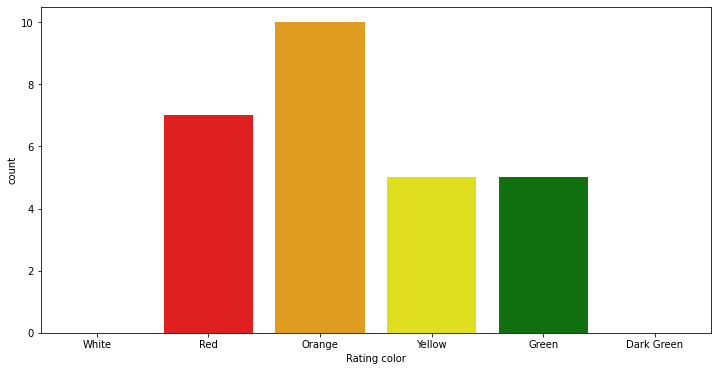

In [19]:
#count plot 
sns.countplot(x = 'Rating color',data= Ratings,palette=['white','Red','Orange','Yellow','Green',] )

In [67]:
df2[df2['Aggregate rating']==0.0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [36]:
#country with rating 
df2.groupby(['Aggregate rating','Country']).size().reset_index().rename(columns={0:'frequency'})

,Aggregate rating,Country,frequency
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


### Observation 
In india only customers gives bad rating based many factors or say they dont care about rating 



In [35]:
#countries with currencies 
df2.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'frequency'})

,Country,Currency,frequency
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### Observation 

Countries with in respect to currencies

In [43]:
df2.groupby(['Country','Has Online delivery']).size()

Country         Has Online delivery
Australia       No                       24
Brazil          No                       60
Canada          No                        4
India           No                     6229
                Yes                    2423
Indonesia       No                       21
New Zealand     No                       40
Phillipines     No                       22
Qatar           No                       20
Singapore       No                       20
South Africa    No                       60
Sri Lanka       No                       20
Turkey          No                       34
UAE             No                       32
                Yes                      28
United Kingdom  No                       80
United States   No                      434
dtype: int64

In [50]:
df2[df2['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

### Observation 
We can say here in india there is 2423 cities where zomato providing online delivery 
and also it is showing zomato majorly provides services not in other countries 

In [65]:

df2[df2['Aggregate rating']>4.0].Cuisines.value_counts()

Cafe                                                  28
Italian                                               22
North Indian, Mughlai                                 22
North Indian                                          19
American                                              15
                                                      ..
Japanese, Chinese, Thai, Malaysian, Burmese, Asian     1
American, Cafe                                         1
North Indian, Rajasthani                               1
Italian, Cafe, Chinese, Continental                    1
World Cuisine, Patisserie, Cafe                        1
Name: Cuisines, Length: 662, dtype: int64

### Observation 
Top most cuisines are Cafe,Italian,..like that 